In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
PROJECT_DATA_PATH = '/Users/tanmaymathur/Documents/personal_workspace/recommender/docs/'
USERS_FILE = '{parent_dir}/users.txt'
HOTELS_FILE = '{parent_dir}/hotels.txt'
ACTIVITY_FILE = '{parent_dir}/activity.txt'
SEP = '\t'

In [3]:
users_df = pd.read_csv(USERS_FILE.format(parent_dir=PROJECT_DATA_PATH), sep=SEP)
hotels_df = pd.read_csv(HOTELS_FILE.format(parent_dir=PROJECT_DATA_PATH), sep=SEP)
activity_df = pd.read_csv(ACTIVITY_FILE.format(parent_dir=PROJECT_DATA_PATH), sep=SEP)

In [5]:
print "Users data:\n", users_df.sample(5)

Users data:
      user  home continent  gender
3831  3832               2  female
1001  1002               1    male
1293  1294               1    male
2180  2181               3  female
850    851               2  female


In [7]:
print "Hotels data :\n", hotels_df.sample(5)

Hotels data :
    hotel  star_rating
63     64          5.0
3       4          4.0
25     26          4.0
32     33          3.5
15     16          4.5


In [8]:
print "Activity data :\n", activity_df.sample(5)

Activity data :
       user  hotel
14154  3699     56
15681  4111     46
8922   2357     45
14545  3804     52
10784  2809     39


In [25]:
"""Lets count the number of unique home continents"""
print "Unique continents are :",set(users_df['home continent'])
print "Number of unique continents are : ", len(set(users_df['home continent']))

Unique continents are : set([1, 2, 3, 4, 5, 6, 7])
Number of unique continents are :  7


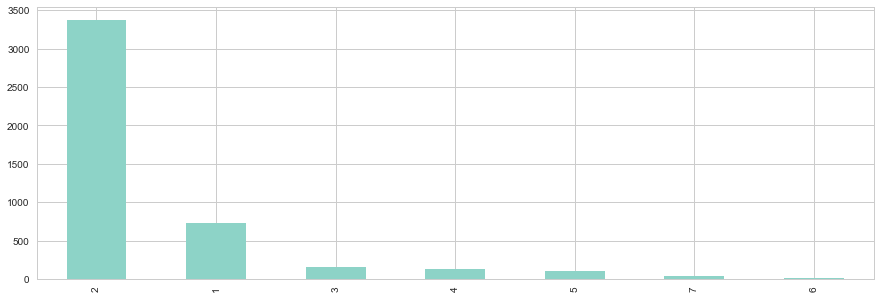

In [116]:
"Distribution of users per continent"
users_df['home continent'].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

In [118]:
#Q1a. What continent is the hotel in?
"""To answer the above question we do the following steps:
1. Merge users and activity data
2. Identify unique rows by user id and hotel id
2. Group and count the hotels by hotel id and home continent id
3. Sort the grouped result and pick the majority home continent id for hotel id

Assumption: Majority users in our dataset dont travel across continents
"""
users_activity_df = pd.merge(users_df, activity_df, how='inner', on='user')
unique_users_activity_df = users_activity_df.drop_duplicates(['user','hotel'])
hotel_home_continent_df = unique_users_activity_df.groupby(['hotel','home continent']).size().reset_index(name='counts').sort_values(['hotel','counts'], ascending=False)
idx = hotel_home_continent_df.groupby(['hotel'])['counts'].transform(max) == hotel_home_continent_df['counts']
hotel_continent = hotel_home_continent_df[idx]

In [120]:
"""The result below shows that the hotel can be visited by users from different continents but based on our assumptions,
we assign hotel to the continent with highest user home continent count"""
hotel_home_continent_df.head(10)

,hotel,home continent,counts
415,66,2,238
414,66,1,66
417,66,4,15
416,66,3,9
418,66,5,7
419,66,7,1
410,65,2,87
409,65,1,23
412,65,4,4
413,65,5,4


In [121]:
"""Based on our majority hypothesis, we see that all hotels belong to continent 2, which is not very useful information"""
hotel_continent[hotel_continent['home continent'] !=2]

,hotel,home continent,counts


In [32]:
#Q1b. What continent is the hotel in? Try to answer the same question but by changing the our second step
"""To answer the above question we do the following steps:
1. Merge users and activity data
2. We dont identify unique user to hotel visits because the frequency can be a good indicator of home continent
2. Group and count the hotels by hotel id and home continent id
3. Sort the grouped result and pick the majority home continent id for hotel id
Assumption: Majority users in our dataset dont travel across continents
"""
users_activity_df = pd.merge(users_df, activity_df, how='inner', on='user')
hotel_home_continent_df = users_activity_df.groupby(['hotel','home continent']).size().reset_index(name='counts').sort_values(['hotel','counts'], ascending=False)

In [33]:
"""The result below shows that the hotel can be visited by users from different continents but based on our assumptions,
we assign hotel to the continent with highest user home continent count"""
hotel_home_continent_df.head(10)
"""Looking at the data, no user has visited the same hotel twice and hence does not contribute to finding the home continent"""

,hotel,home continent,counts
415,66,2,238
414,66,1,66
417,66,4,15
416,66,3,9
418,66,5,7
419,66,7,1
410,65,2,87
409,65,1,23
412,65,4,4
413,65,5,4


In [122]:
"""Creating a new column for hotels to tell which continents do the majority users come from (Will be done on training set)"""

'Creating a new column for hotels to tell which continents do the users come from'

In [134]:
hotel_home_continent_df['counts'] = hotel_home_continent_df['counts'].groupby(hotel_home_continent_df['hotel']).transform(lambda x: np.where(x>=np.median(x), x, np.NaN))
hotel_home_continent_df = hotel_home_continent_df.dropna()
hotel_home_continent_df['home continent'] = hotel_home_continent_df['home continent'].astype(str)
hotel_home_continent_df.groupby(['hotel'])['home continent'].apply(','.join).reset_index()

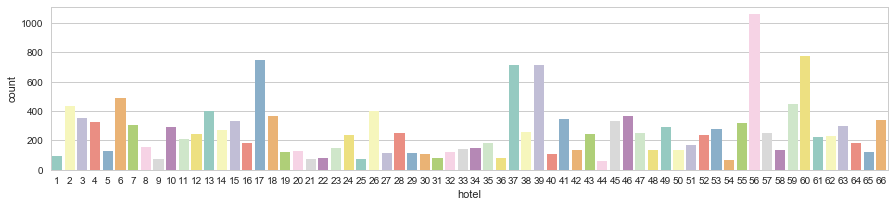

In [50]:
# Q2. What are the most visited hotels?
mean = users_activity_df.groupby(['hotel']).size().mean()
users_activity_df.groupby(['hotel']).agg(['mean','count'])
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))
sns.countplot(x='hotel', data=users_activity_df, palette="Set3")

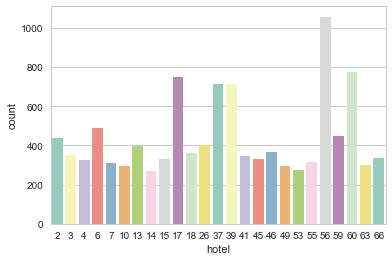

In [53]:
"Plot hotels that have activity more than mean"
hotel_activity_count = users_activity_df.groupby(['hotel']).size().reset_index(name='counts')
hotel_activity_more_than_mean = hotel_activity_count[hotel_activity_count['counts']>mean]
filtered_hotels = pd.merge(users_activity_df, hotel_activity_more_than_mean, on='hotel')
sns.countplot(x='hotel', data=filtered_hotels, palette="Set3")

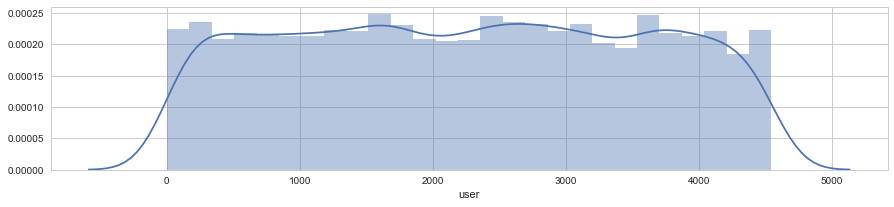

In [61]:
"""Count number of hotels visited by every user"""
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))
sns.distplot(users_activity_df['user'], label='Number of hotels visited by every user')

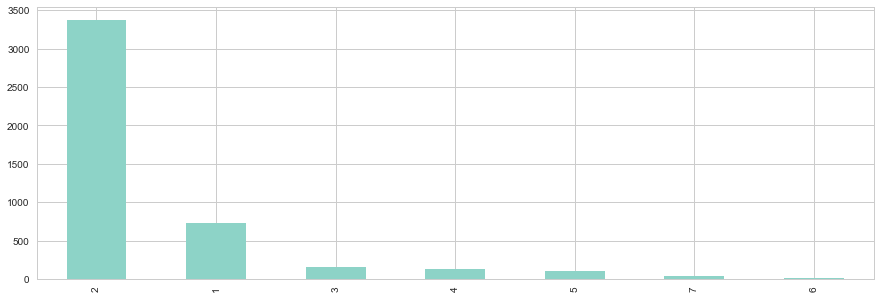

In [66]:
"Distribution of users per continent"
users_df['home continent'].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

In [148]:
"""Add user history information to each user record. Will be used as feature"""
users_activity_df['hotel'] = users_activity_df['hotel'].astype(str)
users_activity_df.groupby(['user'])['hotel'].apply(','.join).reset_index()

,user,hotel
0,1,"39,44"
1,2,"63,2"
2,3,"26,37,63,4,51,52,7,35"
3,4,"63,52"
4,5,"12,17,60,59"
5,6,"37,58,2,46,24,56"
6,7,"49,59,18"
7,8,"53,60,66"
8,9,"50,43"
9,10,"59,7"
